# Basic Linear Model on Grade with raw dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
# % get_backend()
from statsmodels.formula.api import ols

In [2]:
"""function to return RMSE from data cross validation results of mean_squared_error"""
def abs_rt(x):
    return np.sqrt(np.absolute(x))
abs_rt(-16)

4.0

In [3]:
df = pd.read_csv("kc_house_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
dn = df[["grade","bedrooms", "bathrooms", "sqft_living", "floors", "sqft_lot", "sqft_living15", "yr_built", "price"]]
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
grade            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
floors           21597 non-null float64
sqft_lot         21597 non-null int64
sqft_living15    21597 non-null int64
yr_built         21597 non-null int64
price            21597 non-null float64
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


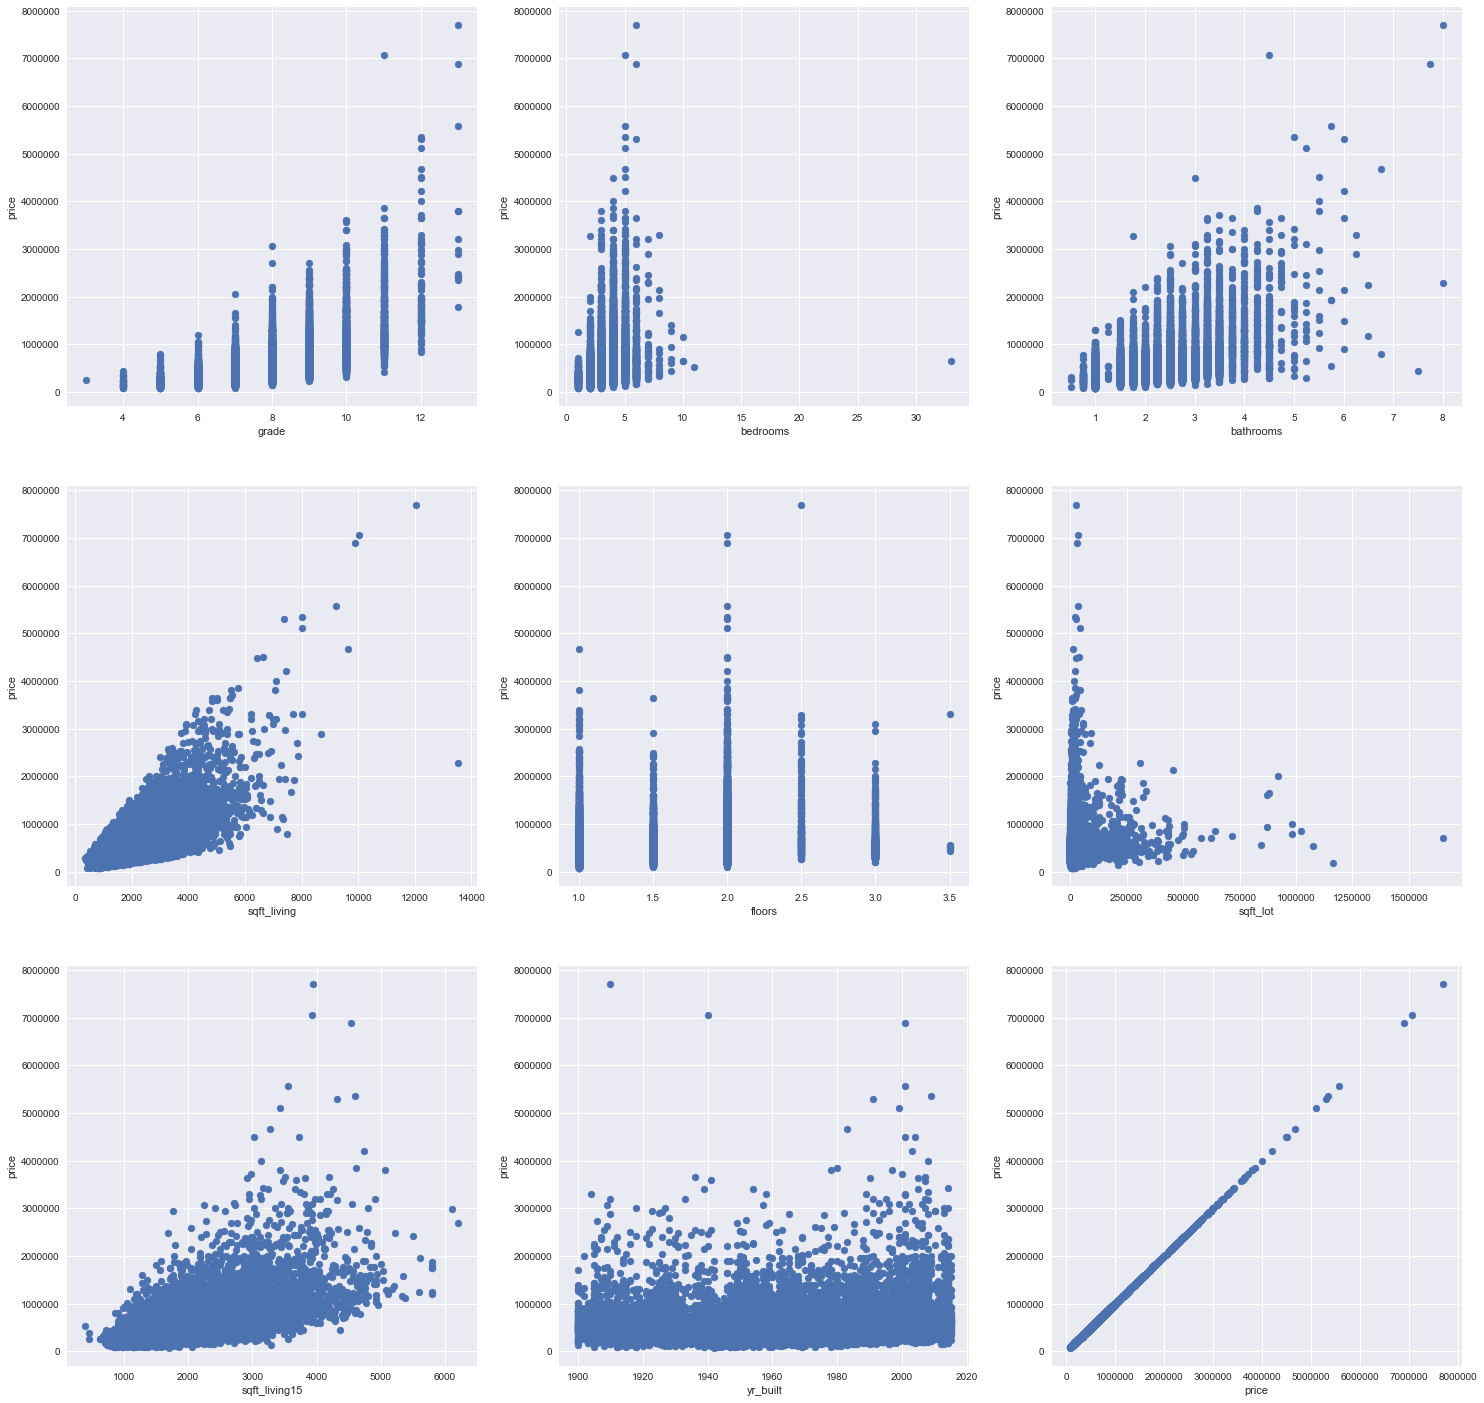

In [5]:
fig, axes = plt.subplots(3, 3, figsize = (25 , 25))

for i, axe in enumerate(axes.flatten()):
    if i > 9:
        break
    else:
        col = dn.columns[i]
        axe.scatter(dn[col], dn["price"])
        axe.set_xlabel(col)
        axe.set_ylabel("price")

In [6]:
dn.corr()

,grade,bedrooms,bathrooms,sqft_living,floors,sqft_lot,sqft_living15,yr_built,price
grade,1.000000,0.356563,0.665838,0.762779,0.458794,0.114731,0.713867,0.447865,0.667951
bedrooms,0.356563,1.000000,0.514508,0.578212,0.177944,0.032471,0.393406,0.155670,0.308787
bathrooms,0.665838,0.514508,1.000000,0.755758,0.502582,0.088373,0.569884,0.507173,0.525906
sqft_living,0.762779,0.578212,0.755758,1.000000,0.353953,0.173453,0.756402,0.318152,0.701917
floors,0.458794,0.177944,0.502582,0.353953,1.000000,-0.004814,0.280102,0.489193,0.256804
sqft_lot,0.114731,0.032471,0.088373,0.173453,-0.004814,1.000000,0.144763,0.052946,0.089876
sqft_living15,0.713867,0.393406,0.569884,0.756402,0.280102,0.144763,1.000000,0.326377,0.585241
yr_built,0.447865,0.155670,0.507173,0.318152,0.489193,0.052946,0.326377,1.000000,0.053953
price,0.667951,0.308787,0.525906,0.701917,0.256804,0.089876,0.585241,0.053953,1.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


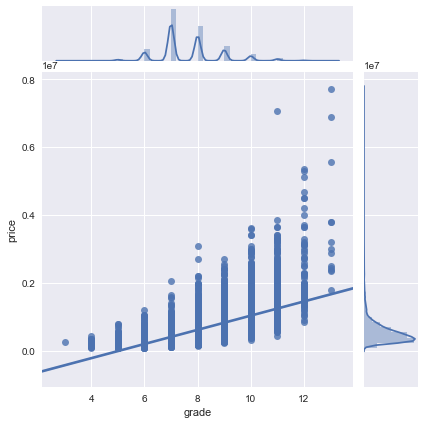

In [7]:
sns.jointplot(x = dn.grade, y = dn.price, data = dn, kind = 'reg')

In [8]:
"""Build regression model for grade's effect on price"""
f1 = "price~grade"
model = ols(formula = f1, data = dn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:54:04   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The p value for this model is very low, but its R-squared value of 0.446 is lower than that of sqft_living, which is 0.493. Next we'll train the model on the data, experimenting with different k-folds and their influence on underfitting vs overfitting.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import svm


Here's a simple train-test-split creation 20 times, using a test_size of 0.33:

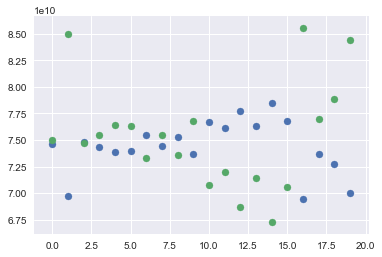

In [10]:
X = dn[['grade']]
y = dn.price
train_err = []
test_err = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(20)), train_err, label='training Error')
plt.scatter(list(range(20)), test_err, label='testing Error')

plt.show()

### Cross-validation training with 5, 10, and 20 folds:

In [11]:
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_5_results, cv_10_results, cv_20_results)

-74859758390.80728 -74928168090.32834 -74854924163.44409


In [12]:
"""RMSE of this model:"""
print(abs_rt(cv_5_results) ,abs_rt(cv_10_results), abs_rt(cv_20_results))

273605.1139704945 273730.10081159935 273596.2795131617


### Notice these cross validation scores are extremely high in the negative direction. For comparison, the results for the model wrt sqft_living are -68540860556.675186, -68531533029.56028, and  -68531082338.88366. For a next step I'd like to scale the price and grade to 1.

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
stan_scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler

In [14]:
ds = dn.copy()
ds.head()

,grade,bedrooms,bathrooms,sqft_living,floors,sqft_lot,sqft_living15,yr_built,price
0,7,3,1.00,1180,1.0,5650,1340,1955,221900.0
1,7,3,2.25,2570,2.0,7242,1690,1951,538000.0
2,6,2,1.00,770,1.0,10000,2720,1933,180000.0
3,7,4,3.00,1960,1.0,5000,1360,1965,604000.0
4,8,3,2.00,1680,1.0,8080,1800,1987,510000.0


In [15]:
ds.loc[:, "log_grade"] = np.log(ds.loc[: , "grade"]).copy()
ds.loc[:,"log_price"] = np.log(ds.loc[:,"price"]).copy()
ds.head()

,grade,bedrooms,bathrooms,sqft_living,floors,sqft_lot,sqft_living15,yr_built,price,log_grade,log_price
0,7,3,1.00,1180,1.0,5650,1340,1955,221900.0,1.945910,12.309982
1,7,3,2.25,2570,2.0,7242,1690,1951,538000.0,1.945910,13.195614
2,6,2,1.00,770,1.0,10000,2720,1933,180000.0,1.791759,12.100712
3,7,4,3.00,1960,1.0,5000,1360,1965,604000.0,1.945910,13.311329
4,8,3,2.00,1680,1.0,8080,1800,1987,510000.0,2.079442,13.142166


In [16]:
columns_to_normalize = ["grade", "price"]
x = ds[columns_to_normalize].values
x

array([[7.00000e+00, 2.21900e+05],
       [7.00000e+00, 5.38000e+05],
       [6.00000e+00, 1.80000e+05],
       ...,
       [7.00000e+00, 4.02101e+05],
       [8.00000e+00, 4.00000e+05],
       [7.00000e+00, 3.25000e+05]])

In [17]:
x_scaled = stan_scaler.fit_transform(x)

dx = pd.DataFrame(x_scaled, columns = columns_to_normalize, index = df.index)


In [18]:
dx.rename(columns = {"price": "scaled_price", "grade": "scaled_grade"}, inplace = True)
dx.head()

,scaled_grade,scaled_price
0,-0.560800,-0.866716
1,-0.560800,-0.006252
2,-1.413190,-0.980773
3,-0.560800,0.173409
4,0.291589,-0.082471


In [19]:
dss = ds.join(dx)
dss.head()

,grade,bedrooms,bathrooms,sqft_living,floors,sqft_lot,sqft_living15,yr_built,price,log_grade,log_price,scaled_grade,scaled_price
0,7,3,1.00,1180,1.0,5650,1340,1955,221900.0,1.945910,12.309982,-0.560800,-0.866716
1,7,3,2.25,2570,2.0,7242,1690,1951,538000.0,1.945910,13.195614,-0.560800,-0.006252
2,6,2,1.00,770,1.0,10000,2720,1933,180000.0,1.791759,12.100712,-1.413190,-0.980773
3,7,4,3.00,1960,1.0,5000,1360,1965,604000.0,1.945910,13.311329,-0.560800,0.173409
4,8,3,2.00,1680,1.0,8080,1800,1987,510000.0,2.079442,13.142166,0.291589,-0.082471


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


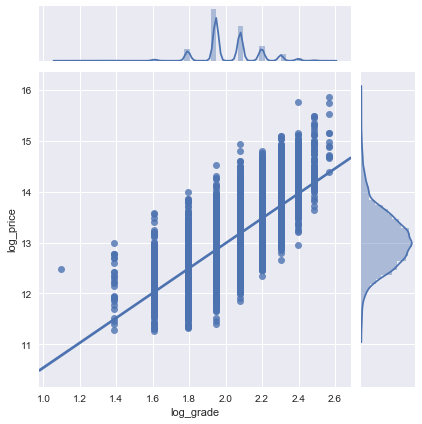

In [20]:
sns.jointplot(x = dss.log_grade, y = dss.log_price, data = dss, kind = 'reg')

In [21]:
"""Build regression model for log_grade's effect on log_price"""
f1 = "log_price~log_grade"
model = ols(formula = f1, data = dss).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 2.005e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:54:57   Log-Likelihood:                -9701.3
No. Observations:               21597   AIC:                         1.941e+04
Df Residuals:                   21595   BIC:                         1.942e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0958      0.035    230.826      0.000       8.027       8.165
log_grade      2.4463      0.017    141.587      0.000       2.412       2.480
==============================================================================
Omnibus:                      204.431   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.383
Skew:                           0.218   Prob(JB):                     1.03e-47
Kurtosis:                       3.224   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This gives us an R-squared value of 0.481, an improvement over the original R-squared value of 0.446.

### Train data log_grade log_price

In [22]:

X = dss[['log_grade']]
y = dss.log_price

In [23]:
"""Cross-validation training with 5, 10, and 20 folds:"""
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_5_results, cv_10_results, cv_20_results)


-0.1438814543608226 -0.14399601218298572 -0.14390967811251032


In [103]:
print(abs_rt(cv_5_results), abs_rt(cv_10_results), abs_rt(cv_20_results))

0.37931708946582227 0.3794680647735534 0.37935429101634044


### These values look very low, but they are about changes in ln(price), not actual price.

In [97]:
# Previously:  neg_mean_squared_error -74859758390.80728 -74928168090.32834 
# -74854924163.44409 
# RMSE 273605.1139704945, 273730.10081159935, 273596.2795131617

### Train data log_grade and price

In [33]:
X = dss[['log_grade']]
y = dss.price

In [34]:
"""Cross-validation training with 5, 10, and 20 folds:"""
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_5_results, cv_10_results, cv_20_results)

-80622685892.80302 -80687574109.45808 -80623258036.25287


In [35]:
print(abs_rt(cv_5_results), abs_rt(cv_10_results), abs_rt(cv_20_results))

283941.3423452158 284055.58278171206 283942.3498463251


### Run simple regression and cross validation for scaled values. dx is the dataframe with only the scaled values of price and grade.

In [27]:
f = "scaled_price~scaled_grade"
model = ols(formula = f, data = dx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           scaled_price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:58:07   Log-Likelihood:                -24264.
No. Observations:               21597   AIC:                         4.853e+04
Df Residuals:                   21595   BIC:                         4.855e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.337e-17      0.005  -8.56e-15      1.000      -0.010       0.010
scaled_grade     0.6680      0.005    131.895      0.000       0.658       0.678
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-squared value is the same as the one from unscaled.

In [28]:
X = dx[['scaled_grade']]
y = dx.scaled_price

In [29]:
"""Cross-validation training with 5, 10, and 20 folds:"""
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_5_results, cv_10_results, cv_20_results)

-0.5547094333347301 -0.5552163479504284 -0.5546736117988493


In [30]:
print(abs_rt(cv_5_results), abs_rt(cv_10_results), abs_rt(cv_20_results))

0.7447881801792575 0.7451284103766467 0.7447641316543442


In [31]:
X = dx[['scaled_grade']]
y = dss.price

In [32]:
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_5_results, cv_10_results, cv_20_results)

-74859758390.80728 -74928168090.32834 -74854924163.44412


In [110]:
print(abs_rt(cv_5_results), abs_rt(cv_10_results), abs_rt(cv_20_results))

273605.1139704945 273730.10081159935 273596.27951316175


### In conclusion, running scaled_price~scaled_grade is equivalent to price~grade, log_price~log_grade looks amazing but is deceptive because price~log_grade is worse than price~grade